In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
dt = pd.read_csv('winequality-red.csv', sep =';')
dt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
dt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


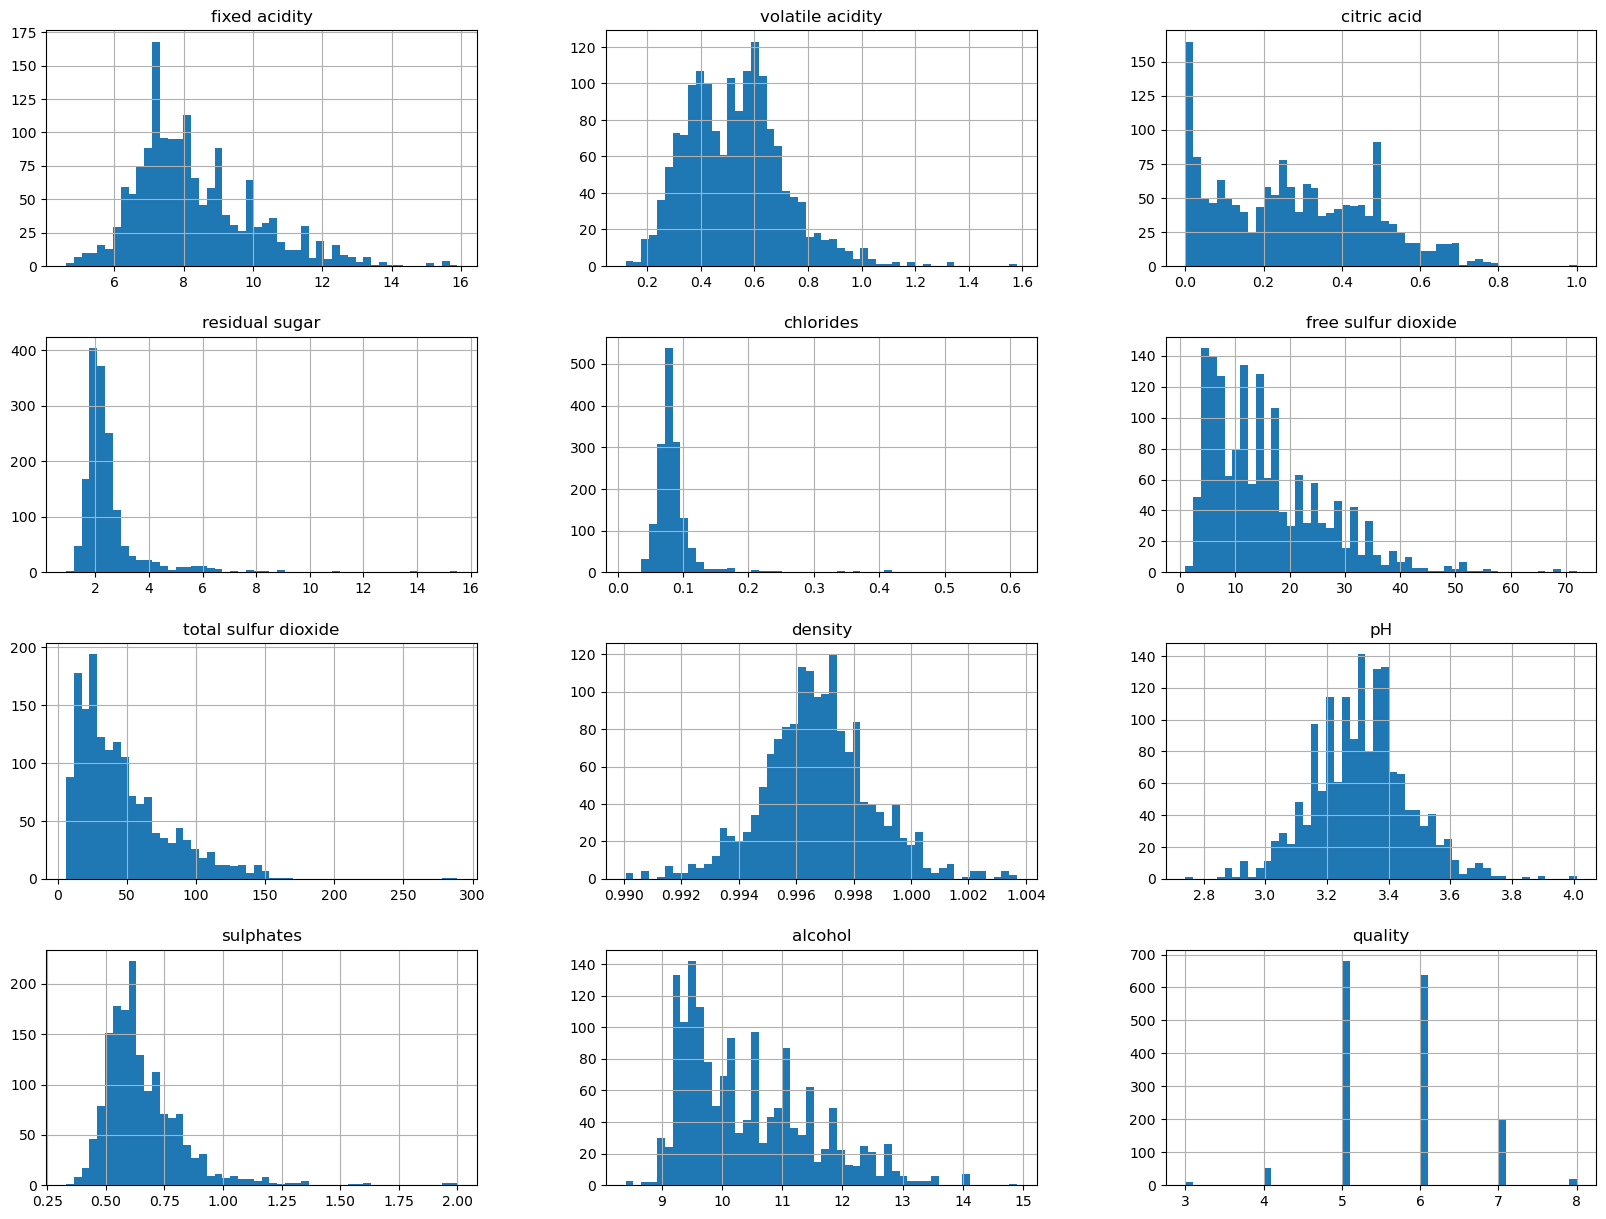

In [6]:
dt.hist(bins=50, figsize=(20, 15))
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X = dt.drop(columns=['quality'])
x_train, x_test, y_train, y_test = train_test_split(X, dt['quality'], test_size=0.3, random_state=42)

In [12]:
corr_matrix = dt.corr()
corr_matrix['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

array([[<Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='sulphates', ylabel='alcohol'>,
        <Axes: xlabel='citric acid', ylabel='alcohol'>,
        <Axes: xlabel='volatile acidity', ylabel='alcohol'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='alcohol'>],
       [<Axes: xlabel='alcohol', ylabel='sulphates'>,
        <Axes: xlabel='sulphates', ylabel='sulphates'>,
        <Axes: xlabel='citric acid', ylabel='sulphates'>,
        <Axes: xlabel='volatile acidity', ylabel='sulphates'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='sulphates'>],
       [<Axes: xlabel='alcohol', ylabel='citric acid'>,
        <Axes: xlabel='sulphates', ylabel='citric acid'>,
        <Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='volatile acidity', ylabel='citric acid'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='citric acid'>],
       [<Axes: xlabel='alcohol', ylabel='volatile acidity'>,
        <Axes: xlabel='sulphates', ylabel=

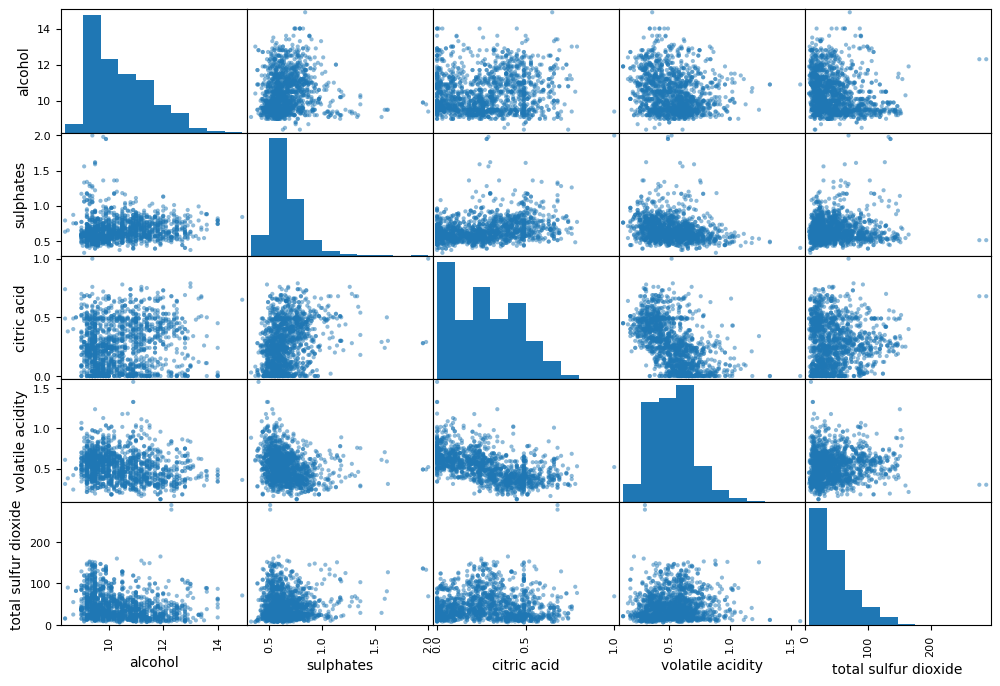

In [13]:
from pandas.plotting import scatter_matrix
attributes = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity', 'total sulfur dioxide']
scatter_matrix(dt[attributes], figsize=(12,8))

<Axes: xlabel='quality', ylabel='alcohol'>

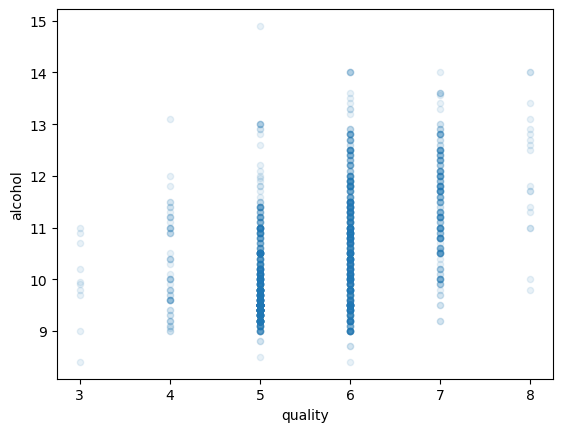

In [15]:
dt.plot(kind='scatter', y='alcohol', x='quality', alpha=0.1)

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_predict = lin_reg.predict(x_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
print(f"mean squared error = {mse}")

mean squared error = 0.4112348717504203


In [25]:
from sklearn.linear_model import LogisticRegression
log_rig = LogisticRegression(max_iter=5000)
log_rig.fit(x_train, y_train)
y_log_predict = log_rig.predict(x_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_log_predict)
print(f"accuracy score = {acc}")

accuracy score = 0.5645833333333333


C:\Users\prati\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
